In [1]:
import pandas as pd
import numpy as np

# Below option allows us to see the entire comment_text column
pd.set_option('display.max_colwidth', None)
# Read in the dataset
train = pd.read_csv("../data/kaggle_train.csv")
train = train.drop(columns=['id'])

labels = ["toxic", "severe_toxic", "obscene", "threat", "insult", "identity_hate"]

print("Stats of training set: ", train.shape)
print("Labels:", labels)

Stats of training set:  (159571, 7)
Labels: ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']


In [2]:
train.head()

,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,"Explanation\r\nWhy the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27",0,0,0,0,0,0
1,"D'aww! He matches this background colour I'm seemingly stuck with. Thanks. (talk) 21:51, January 11, 2016 (UTC)",0,0,0,0,0,0
2,"Hey man, I'm really not trying to edit war. It's just that this guy is constantly removing relevant information and talking to me through edits instead of my talk page. He seems to care more about the formatting than the actual info.",0,0,0,0,0,0
3,"""\r\nMore\r\nI can't make any real suggestions on improvement - I wondered if the section statistics should be later on, or a subsection of """"types of accidents"""" -I think the references may need tidying so that they are all in the exact same format ie date format etc. I can do that later on, if no-one else does first - if you have any preferences for formatting style on references or want to do it yourself please let me know.\r\n\r\nThere appears to be a backlog on articles for review so I guess there may be a delay until a reviewer turns up. It's listed in the relevant form eg Wikipedia:Good_article_nominations#Transport """,0,0,0,0,0,0
4,"You, sir, are my hero. Any chance you remember what page that's on?",0,0,0,0,0,0


# Text Preprocessing

Below I have noticed some inconsistencies in the data and by preprocessing it, we can ensure a clean dataset.

In [3]:
# Convert comment to lowercase
def to_lowercase(text):
    return text.lower()

train['comment_text'] = train['comment_text'].apply(to_lowercase)
train.head()

,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,"explanation\r\nwhy the edits made under my username hardcore metallica fan were reverted? they weren't vandalisms, just closure on some gas after i voted at new york dolls fac. and please don't remove the template from the talk page since i'm retired now.89.205.38.27",0,0,0,0,0,0
1,"d'aww! he matches this background colour i'm seemingly stuck with. thanks. (talk) 21:51, january 11, 2016 (utc)",0,0,0,0,0,0
2,"hey man, i'm really not trying to edit war. it's just that this guy is constantly removing relevant information and talking to me through edits instead of my talk page. he seems to care more about the formatting than the actual info.",0,0,0,0,0,0
3,"""\r\nmore\r\ni can't make any real suggestions on improvement - i wondered if the section statistics should be later on, or a subsection of """"types of accidents"""" -i think the references may need tidying so that they are all in the exact same format ie date format etc. i can do that later on, if no-one else does first - if you have any preferences for formatting style on references or want to do it yourself please let me know.\r\n\r\nthere appears to be a backlog on articles for review so i guess there may be a delay until a reviewer turns up. it's listed in the relevant form eg wikipedia:good_article_nominations#transport """,0,0,0,0,0,0
4,"you, sir, are my hero. any chance you remember what page that's on?",0,0,0,0,0,0


In [4]:
import re
# Remove HTML tags from the comments
def remove_html(text):
    return re.sub(r"<.*>", "", text, flags=re.MULTILINE)
    
train['comment_text'] = train['comment_text'].apply(remove_html)
train.head()

,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,"explanation\r\nwhy the edits made under my username hardcore metallica fan were reverted? they weren't vandalisms, just closure on some gas after i voted at new york dolls fac. and please don't remove the template from the talk page since i'm retired now.89.205.38.27",0,0,0,0,0,0
1,"d'aww! he matches this background colour i'm seemingly stuck with. thanks. (talk) 21:51, january 11, 2016 (utc)",0,0,0,0,0,0
2,"hey man, i'm really not trying to edit war. it's just that this guy is constantly removing relevant information and talking to me through edits instead of my talk page. he seems to care more about the formatting than the actual info.",0,0,0,0,0,0
3,"""\r\nmore\r\ni can't make any real suggestions on improvement - i wondered if the section statistics should be later on, or a subsection of """"types of accidents"""" -i think the references may need tidying so that they are all in the exact same format ie date format etc. i can do that later on, if no-one else does first - if you have any preferences for formatting style on references or want to do it yourself please let me know.\r\n\r\nthere appears to be a backlog on articles for review so i guess there may be a delay until a reviewer turns up. it's listed in the relevant form eg wikipedia:good_article_nominations#transport """,0,0,0,0,0,0
4,"you, sir, are my hero. any chance you remember what page that's on?",0,0,0,0,0,0


In [5]:
# Remove links from the comments
def remove_links(text):
    text= re.sub(r"http\S+"," ",text, flags=re.MULTILINE)
    return re.sub(r"www\S+"," ",text, flags=re.MULTILINE)

train['comment_text'] = train['comment_text'].apply(remove_links)
train.head()

,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,"explanation\r\nwhy the edits made under my username hardcore metallica fan were reverted? they weren't vandalisms, just closure on some gas after i voted at new york dolls fac. and please don't remove the template from the talk page since i'm retired now.89.205.38.27",0,0,0,0,0,0
1,"d'aww! he matches this background colour i'm seemingly stuck with. thanks. (talk) 21:51, january 11, 2016 (utc)",0,0,0,0,0,0
2,"hey man, i'm really not trying to edit war. it's just that this guy is constantly removing relevant information and talking to me through edits instead of my talk page. he seems to care more about the formatting than the actual info.",0,0,0,0,0,0
3,"""\r\nmore\r\ni can't make any real suggestions on improvement - i wondered if the section statistics should be later on, or a subsection of """"types of accidents"""" -i think the references may need tidying so that they are all in the exact same format ie date format etc. i can do that later on, if no-one else does first - if you have any preferences for formatting style on references or want to do it yourself please let me know.\r\n\r\nthere appears to be a backlog on articles for review so i guess there may be a delay until a reviewer turns up. it's listed in the relevant form eg wikipedia:good_article_nominations#transport """,0,0,0,0,0,0
4,"you, sir, are my hero. any chance you remember what page that's on?",0,0,0,0,0,0


In [6]:
import string
# Remove punctuation marks 
def remove_punctuation(text):
    for i in string.punctuation:
        text = text.replace(i, "")
    return text

train['comment_text'] = train['comment_text'].apply(remove_punctuation)
train.head()

,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,explanation\r\nwhy the edits made under my username hardcore metallica fan were reverted they werent vandalisms just closure on some gas after i voted at new york dolls fac and please dont remove the template from the talk page since im retired now892053827,0,0,0,0,0,0
1,daww he matches this background colour im seemingly stuck with thanks talk 2151 january 11 2016 utc,0,0,0,0,0,0
2,hey man im really not trying to edit war its just that this guy is constantly removing relevant information and talking to me through edits instead of my talk page he seems to care more about the formatting than the actual info,0,0,0,0,0,0
3,\r\nmore\r\ni cant make any real suggestions on improvement i wondered if the section statistics should be later on or a subsection of types of accidents i think the references may need tidying so that they are all in the exact same format ie date format etc i can do that later on if noone else does first if you have any preferences for formatting style on references or want to do it yourself please let me know\r\n\r\nthere appears to be a backlog on articles for review so i guess there may be a delay until a reviewer turns up its listed in the relevant form eg wikipediagoodarticlenominationstransport,0,0,0,0,0,0
4,you sir are my hero any chance you remember what page thats on,0,0,0,0,0,0


In [7]:
# Remove special characters such as: \n \r \t
def remove_special(text):
    return re.sub(r"[\n\t\\\/\r]"," ",text, flags=re.MULTILINE)

train['comment_text'] = train['comment_text'].apply(remove_special)
train.head()

,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,explanation why the edits made under my username hardcore metallica fan were reverted they werent vandalisms just closure on some gas after i voted at new york dolls fac and please dont remove the template from the talk page since im retired now892053827,0,0,0,0,0,0
1,daww he matches this background colour im seemingly stuck with thanks talk 2151 january 11 2016 utc,0,0,0,0,0,0
2,hey man im really not trying to edit war its just that this guy is constantly removing relevant information and talking to me through edits instead of my talk page he seems to care more about the formatting than the actual info,0,0,0,0,0,0
3,more i cant make any real suggestions on improvement i wondered if the section statistics should be later on or a subsection of types of accidents i think the references may need tidying so that they are all in the exact same format ie date format etc i can do that later on if noone else does first if you have any preferences for formatting style on references or want to do it yourself please let me know there appears to be a backlog on articles for review so i guess there may be a delay until a reviewer turns up its listed in the relevant form eg wikipediagoodarticlenominationstransport,0,0,0,0,0,0
4,you sir are my hero any chance you remember what page thats on,0,0,0,0,0,0


In [8]:
# Remove stopwords using nltk's stopwords package
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = stopwords.words('english')

train['comment_text'] = train['comment_text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))
train.head()


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Andrew\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,explanation edits made username hardcore metallica fan reverted werent vandalisms closure gas voted new york dolls fac please dont remove template talk page since im retired now892053827,0,0,0,0,0,0
1,daww matches background colour im seemingly stuck thanks talk 2151 january 11 2016 utc,0,0,0,0,0,0
2,hey man im really trying edit war guy constantly removing relevant information talking edits instead talk page seems care formatting actual info,0,0,0,0,0,0
3,cant make real suggestions improvement wondered section statistics later subsection types accidents think references may need tidying exact format ie date format etc later noone else first preferences formatting style references want please let know appears backlog articles review guess may delay reviewer turns listed relevant form eg wikipediagoodarticlenominationstransport,0,0,0,0,0,0
4,sir hero chance remember page thats,0,0,0,0,0,0


In [9]:
# As you can see above, there are numbers and/or dates
# I will remove those as they are not helpful

def remove_numbers(text):
    return re.sub(r'\d'," ",text, flags=re.MULTILINE)

train['comment_text'] = train['comment_text'].apply(remove_numbers)
train.head()

,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,explanation edits made username hardcore metallica fan reverted werent vandalisms closure gas voted new york dolls fac please dont remove template talk page since im retired now,0,0,0,0,0,0
1,daww matches background colour im seemingly stuck thanks talk january utc,0,0,0,0,0,0
2,hey man im really trying edit war guy constantly removing relevant information talking edits instead talk page seems care formatting actual info,0,0,0,0,0,0
3,cant make real suggestions improvement wondered section statistics later subsection types accidents think references may need tidying exact format ie date format etc later noone else first preferences formatting style references want please let know appears backlog articles review guess may delay reviewer turns listed relevant form eg wikipediagoodarticlenominationstransport,0,0,0,0,0,0
4,sir hero chance remember page thats,0,0,0,0,0,0


# Train, Test, and Validation Split

Below I need to split the dataset into train and test datasets.
However, sklearn's `train_test_split` function does not work for
multi-class classification.

Therefore, I will be creating a train, test, and validation split for each label in the classification.

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(train[["comment_text"]], train[["toxic","severe_toxic","obscene","threat","insult","identity_hate"]], test_size=0.20)
X_train.head()

,comment_text
99714,evanescence new album took years make think amy took long writing songs dealing breakup dont think anything band members leaving
12278,notability acropolis band tag placed acropolis band requesting speedily deleted wikipedia done article appears real person organization band club company etc web content indicate subject notable article subject included encyclopedia criteria speedy deletion articles indicate subjects importance significance may deleted time please see guidelines generally accepted notable first page created read guide writing first article think assert notability subject may contest deletion adding top page existing speedy deletion db tag coupled adding note articles talk page explaining position aware tagged speedy deletion article meets criterion may deleted without delay please remove speedy deletion tag dont hesitate add information article would confirm subjects notability wikipedia guidelines guidelines specific types articles may want check criteria biographies web sites bands companies feel free leave note talk page questions
46341,thanks replaced section mostly following admins suggestions come help clean wish
138931,beyoncé perfume packaging holography awards
137967,ps bot use thing thunder


In [11]:
print("Train shape:",X_train.shape)
print("Test shape:", X_test.shape)

Train shape: (127656, 1)
Test shape: (31915, 1)


# Vectorizing the Comment Text

*Logistic Regression can't take text values as input*

Since the independent variable I have is only text, we will need to use a vectorizer to convert the text into usable data for Logistic Regression.

```

# Max_features = Build a vocabulary that only consider the top max_features ordered by term frequency

# Analyzer = Whether the feature should be made of word or character n-grams. Option ‘char_wb’ creates character n-grams only from text inside word boundaries; n-grams at the edges of words are padded with space.

# ngram_range = (1,1) means only unigrams, (1,2) means unigrams and bigrams, (1,3) means unigrams, bigrams, and trigrams

# Further ngrams knowledge = bigrams means it will learn the occurence of every two words, trigrams would be every 3, etc.

# dtype = type of the matrix returned, default is float64
```

In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.compose import ColumnTransformer

cols_trans = ColumnTransformer([
    ("txt_word", TfidfVectorizer(max_features=10000, analyzer="word", ngram_range=(1,3), dtype=np.float32), "comment_text"),
    ("txt_char", TfidfVectorizer(max_features=10000, analyzer="char", ngram_range=(3,6), dtype=np.float32), "comment_text")
])

## Pipeline 

Create a Pipeline for the data to flow through:

TFIDF Vectorize the data

then

Perform Logistic Regression

In [33]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

pipe = Pipeline([
    ('trans', cols_trans),
    ('clf', LogisticRegression(C=10, solver="sag"))
])

In [34]:
from sklearn import set_config
set_config(display='diagram')
# with display='diagram', simply use display() to see the diagram
display(pipe)
# if desired, set display back to the default
set_config(display='text')

Pipeline(steps=[('trans',
                 ColumnTransformer(transformers=[('txt_word',
                                                  TfidfVectorizer(dtype=<class 'numpy.float32'>,
                                                                  max_features=10000,
                                                                  ngram_range=(1,
                                                                               3)),
                                                  'comment_text'),
                                                 ('txt_char',
                                                  TfidfVectorizer(analyzer='char',
                                                                  dtype=<class 'numpy.float32'>,
                                                                  max_features=10000,
                                                                  ngram_range=(3,
                                                                               6)),
                                                  'comment_text')])),
                ('clf', LogisticRegression(C=10, solver='sag'))])

# Overfit and Underfit

Below I will build and train the `Logistic Regression` model and check if the model is overfit, underfit, or optimal fit.

In [36]:
from sklearn.model_selection import cross_validate

train_accuracy = {}
test_accuracy = {}

for label in labels:
    scores = cross_validate(pipe, X_train, y_train[label], cv = 10, error_score='raise', return_train_score=True)
    train_accuracy[label] = scores["train_score"]
    test_accuracy[label] = scores["test_score"]

c:\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\P

## Checking if model is overfit, underfit, or optimal fit

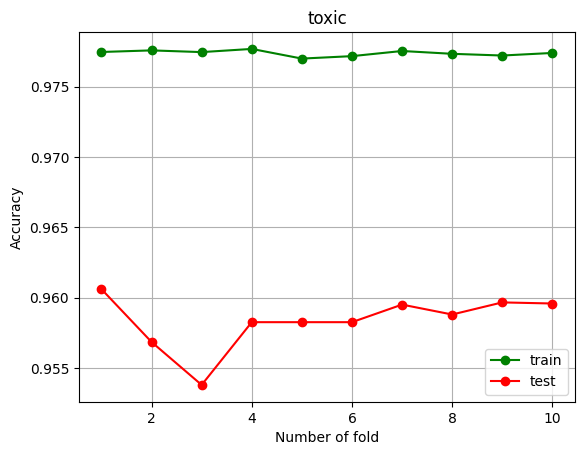

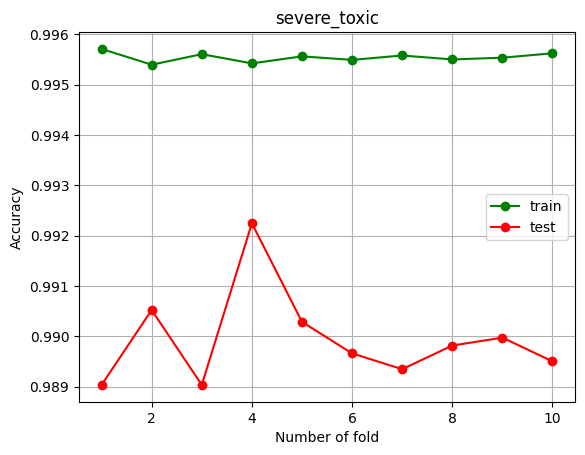

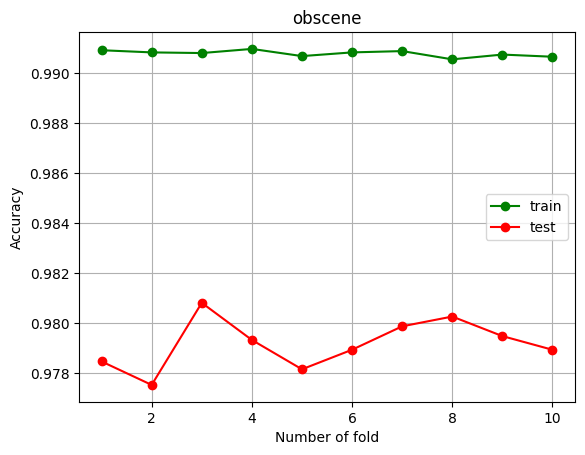

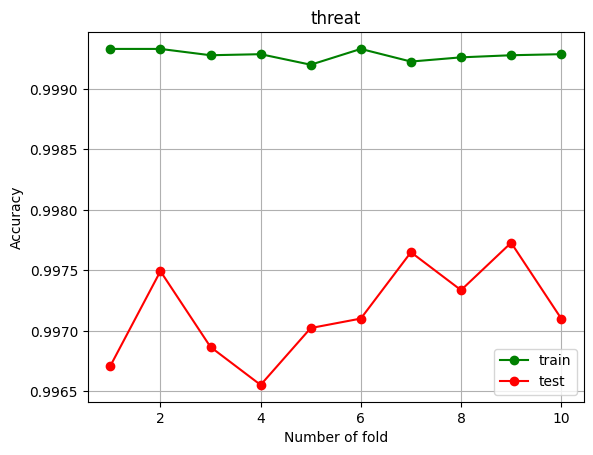

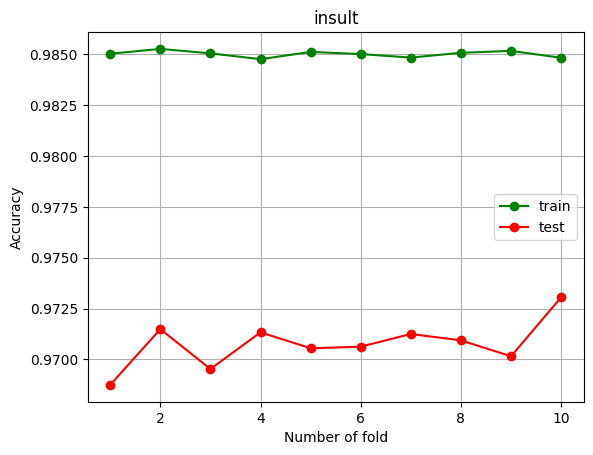

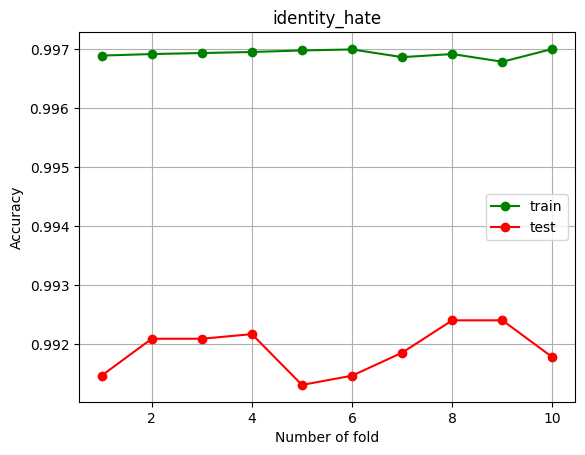

In [37]:
import matplotlib.pyplot as plt

for label in labels:
    folds = range(1, 11)
    plt.plot(folds, train_accuracy[label], 'o-', color='green', label='train')
    plt.plot(folds, test_accuracy[label], 'o-', color='red', label='test')
    plt.legend()
    plt.grid()
    plt.title(label)
    # plt.axis([0.8, 1])
    plt.xlabel('Number of fold')
    plt.ylabel('Accuracy')
    plt.show()